<a href="https://colab.research.google.com/github/vasubajaj7/DataScienceAcaddemy/blob/main/ML%5Cclustering_and_PCA_countries_help_international.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple>Problem Statement

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# <font color=purple> Import necessary libraries</font>

In [3]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

In [4]:
# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



# <font color=purple>1. Reading and Inspection</font>

In [5]:
# Read the given CSV file, and view some sample records
df= pd.read_csv('/content/drive/MyDrive/data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [6]:
# Reading the data dictionary file

data_dict = pd.read_csv('/content/drive/MyDrive/data/data-dictionary.csv')
data_dict.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services. Given as %age of the Total GDP
3,health,Total health spending as %age of Total GDP
4,imports,Imports of goods and services. Given as %age of the Total GDP
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [7]:
#Determine the number of rows and columns
df.shape

(167, 10)

In [8]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
#summary of all the numeric columns in the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


# <font color=purple>2. Cleaning the data</font>

- ### <font color=blue>Checking missing values</font>

In [10]:
print('Total missing values in the data')
print('-'*50)
print(df.isnull().sum())


Total missing values in the data
--------------------------------------------------
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


### <font color=green>We can see that there are no missing values in the data </font>

#### <font color=purple>Convert % columns to actual values </font>

In [11]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] =df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


# <font color=purple>3. Data Visualization</font>

- ### <font color=blue>Heatmap

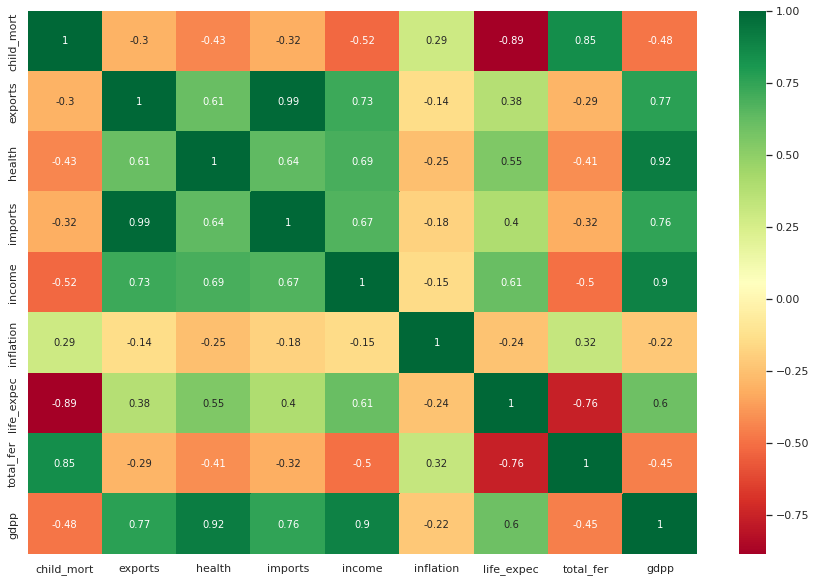

In [13]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))        
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

plt.show()

- #### <font color=green>Child mortality is highly correlated with total fertility with the correlation coefficient of 0.85</font>
- #### <font color=green>Imports & exports, health & gdpp, income & gdpp are also well correlated</font>
- #### <font color=green>Life expectency has strong negative correlation with total fertility of about -0.76</font>
- #### <font color=green>Child mortality is also in strong negative correlation with life expectency</font>

- ### <font color=blue>Income vs Child Mortality

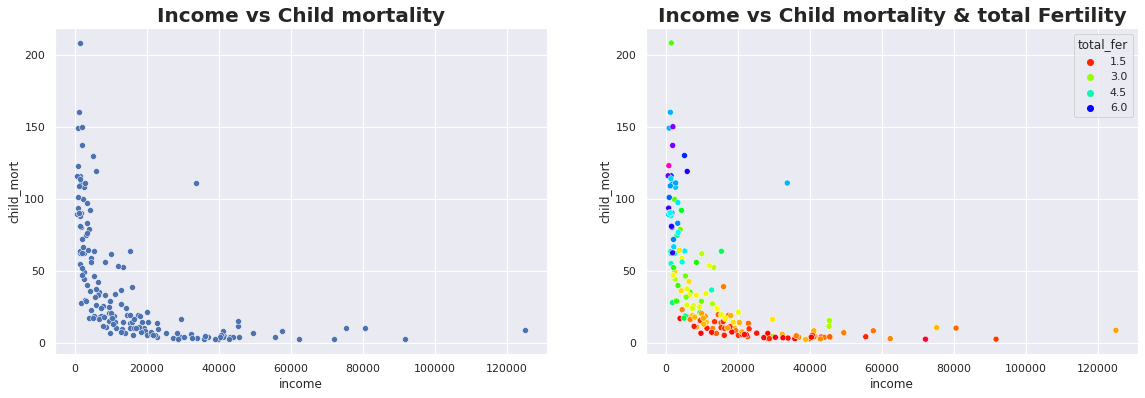

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=df)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=df, palette='gist_rainbow')
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

- #### <font color=green> From the plots above, we can see that low income people have high child mortality, which means death of children under age 5 is more, where there is a low income </font>
- #### <font color=green> Where the income is more we can see there is no mortality
- #### <font color=green> In the second plot we can see that, high fertility rate for a woman and low income have high child mortality


- ### <font color=blue>Pairplot

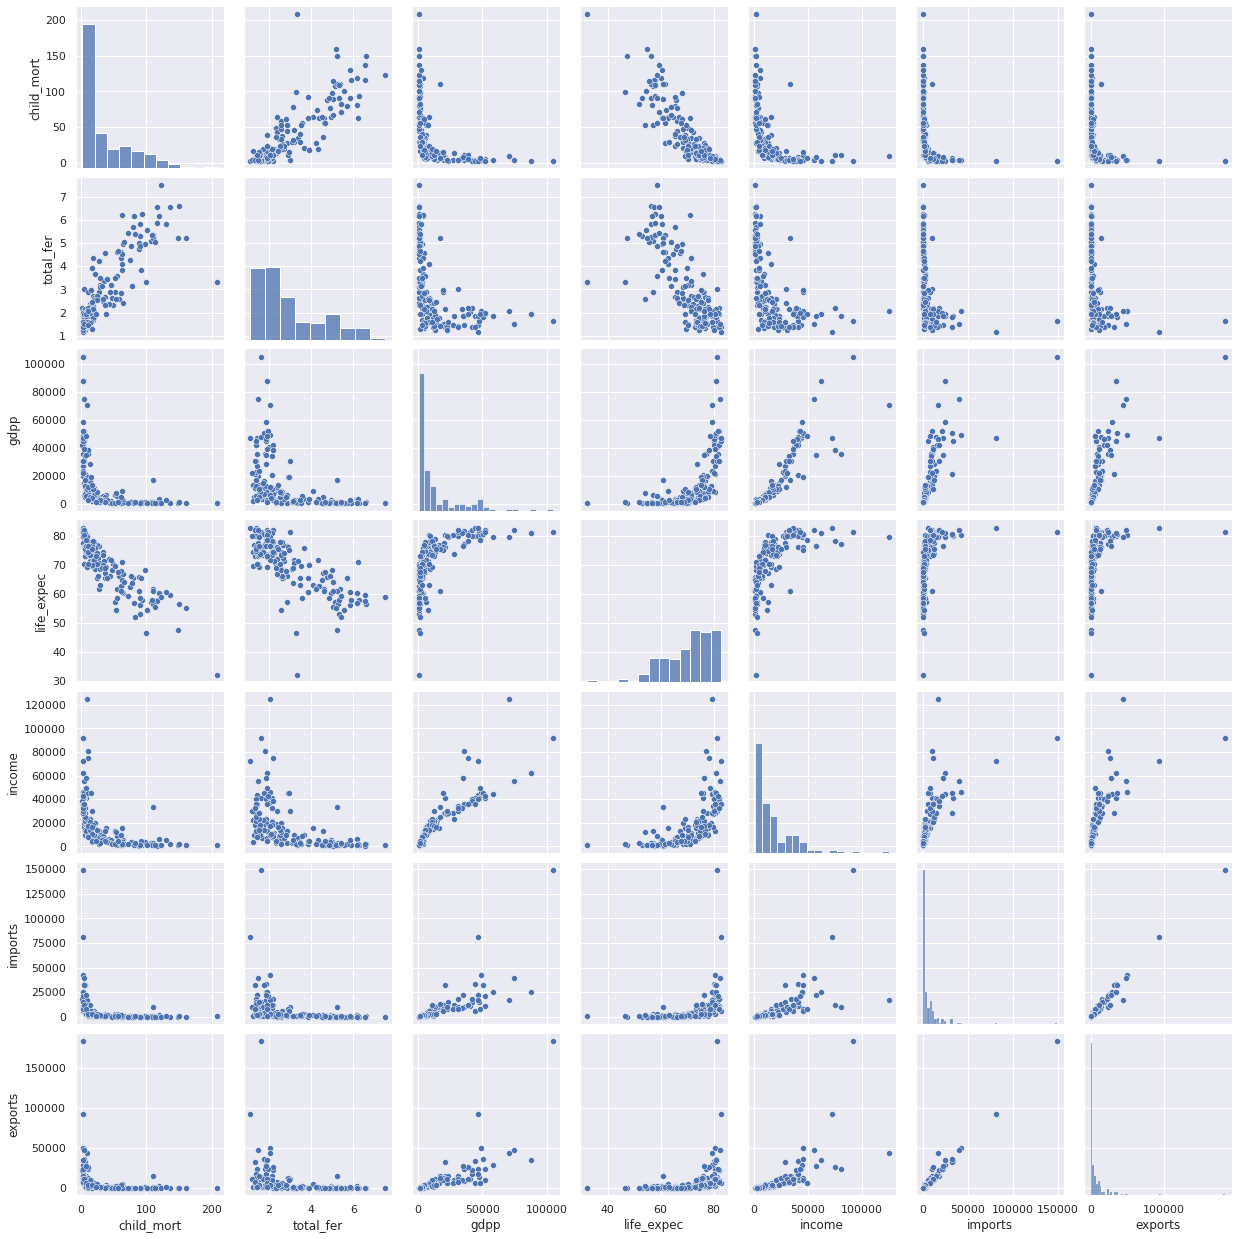

In [15]:
sns.pairplot(df, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

- #### <font color=green>From the pairplot above we can make out how different variables are correlated to each other

- ## <font color=blue> Country vs Child Mortality

In [16]:
Country= df.groupby('country').child_mort.sum().sort_values(ascending=False)
Country=pd.DataFrame(Country)
Country1=Country.head()
Country2=Country.tail()
display(Country1.head())  
print('*'*50)
display(Country2.tail())


,child_mort
country,
Haiti,208.0000
Sierra Leone,160.0000
Chad,150.0000
Central African Republic,149.0000
Mali,137.0000


**************************************************


,child_mort
country,
Finland,3.0000
Sweden,3.0000
Singapore,2.8000
Luxembourg,2.8000
Iceland,2.6000


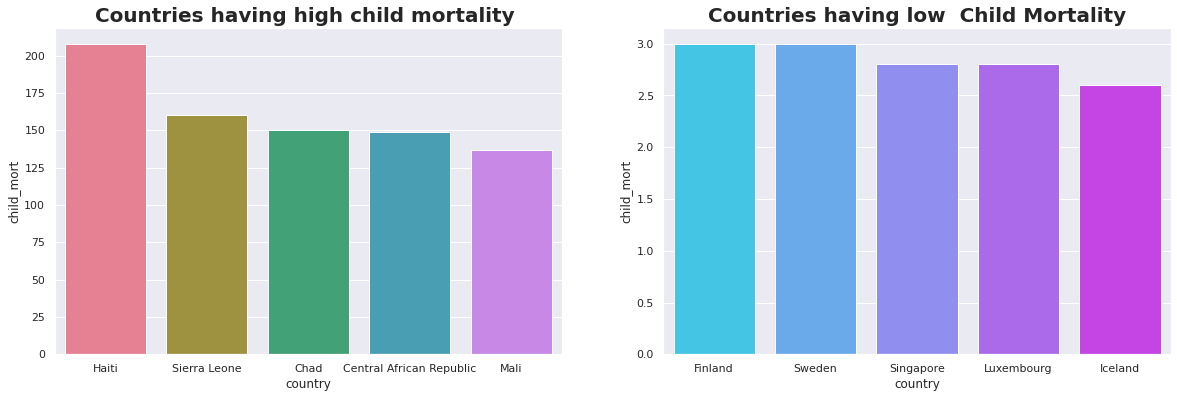

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.index, Country1.child_mort, palette='husl')
plt.title('Countries having high child mortality ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Country2.index, Country2.child_mort, palette='cool')
plt.title('Countries having low  Child Mortality',fontweight="bold", size=20)
plt.show()

- ### <font color=green> Haiti is a country with highest child mortality of around 208 out of 1000 live births. Next comes Sierra Leone 
- ### <font color=green> Iceland and Luxembourg are the countries with less child mortality   

- ## <font color=blue> Country vs Income

In [18]:
Income= df.groupby('country').income.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
display(Income1)
print('*'* 50)
display(Income2)

,income
country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


**************************************************


,income
country,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


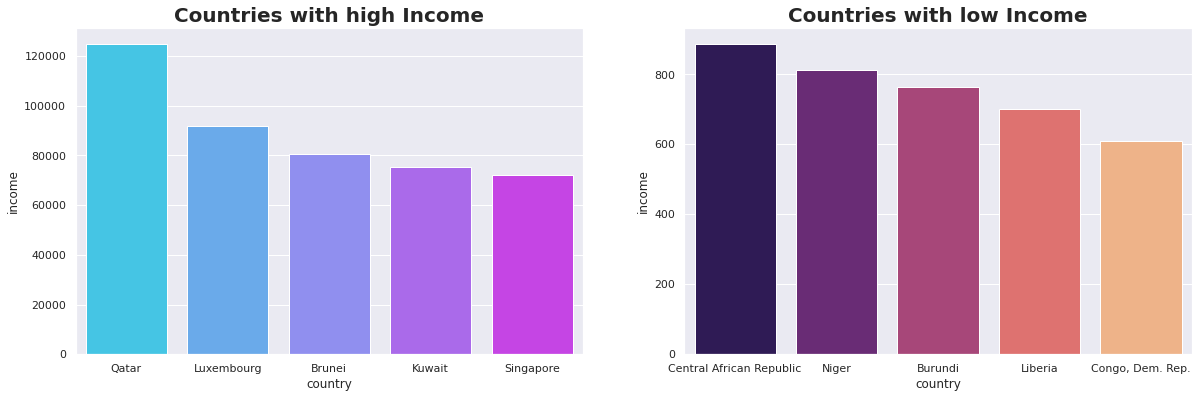

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.index, Income1.income, palette='cool')
plt.title('Countries with high Income',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Income2.index, Income2.income, palette='magma')
plt.title('Countries with low Income',fontweight="bold", size=20)
plt.show()

- ### <font color=green> Net income per person is more in Qatar which is 125000
- ### <font color=green> Congo, Democratic Republic and Liberia has less income  

 - ## <font color=blue>Country vs GDP

In [20]:
GDP= df.groupby('country').gdpp.sum().sort_values(ascending=False)
GDP=pd.DataFrame(GDP)
GDP1=GDP.head()
GDP2=GDP.tail()
display(GDP1)
print('*'* 50)
display(GDP2)

,gdpp
country,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000


**************************************************


,gdpp
country,
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327
Burundi,231


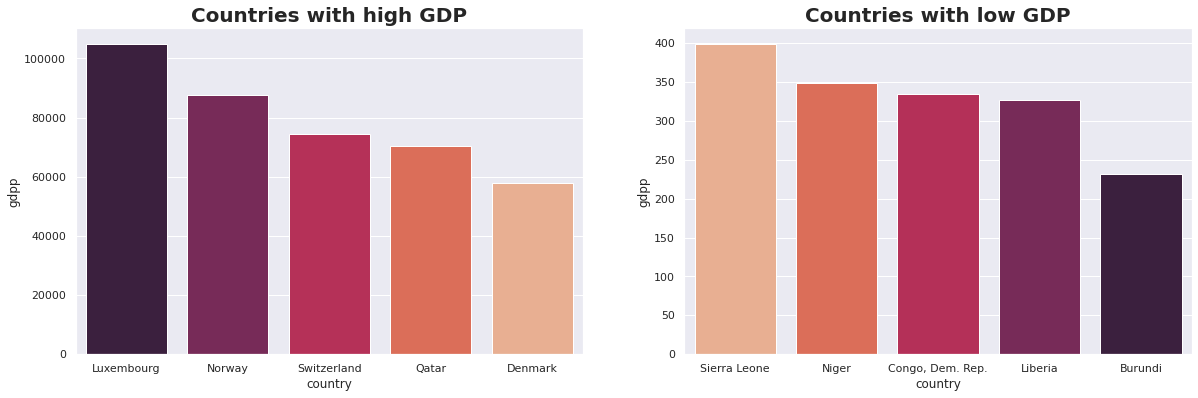

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='rocket')
plt.title('Countries with high GDP',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp, palette='rocket_r')
plt.title('Countries with low GDP',fontweight="bold", size=20)
plt.show()

- ### <font color=green>We can see that Luxembourg has high GDP per capita which is around 105000. Then next comess Norway 
- ### <font color=green>Burundi has very less GDP per capita     

- ## <font color=blue>Country vs Imports

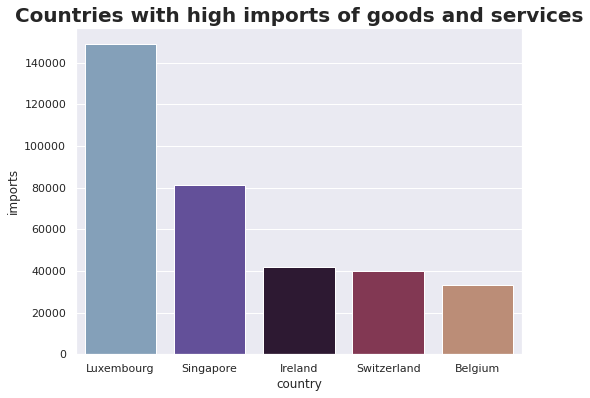

,imports
country,
Luxembourg,149100.0000
Singapore,81084.0000
Ireland,42125.5000
Switzerland,39761.8000
Belgium,33166.8000


,imports
country,
Burundi,90.5520
Myanmar,0.6511


In [22]:
plt.figure(figsize=(8, 6))
Imports=df.groupby('country').imports.sum().sort_values(ascending=False)
Imports= pd.DataFrame(Imports)
Imports1=Imports.head()
sns.barplot(Imports1.index,Imports1.imports, palette='twilight')
plt.title('Countries with high imports of goods and services',fontweight="bold", size=20)
plt.show()
display(Imports1)
Imports2=Imports.tail(2)
display(Imports2)


- ### <font color=green>We can see that Luxembourg has most imports of goods and services of about 149100 per capita
- ### <font color=green>Myanmar has very less import of goods and servicesof about 0.6511 per capita   

- ## <font color=blue>Life Expectancy

In [23]:
Life_Ex= df.sort_values(by=['life_expec'],ascending=True)
Life_Ex.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500,5.4500,32.1000,3.3300,662
87,Lesotho,99.7000,460.9800,129.8700,1181.7000,2380,4.1500,46.5000,3.3000,1170
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446
166,Zambia,83.1000,540.2000,85.9940,451.1400,3280,14.0000,52.0000,5.4000,1460
94,Malawi,90.5000,104.6520,30.2481,160.1910,1030,12.1000,53.1000,5.3100,459


In [24]:
Life_ex=df.sort_values(by=['life_expec'],ascending=False)
display(Life_ex[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2000,6675.0000,4223.0500,6052.0000,35800,-1.9000,82.8000,1.3900,44500
133,Singapore,2.8000,93200.0000,1845.3600,81084.0000,72100,-0.0460,82.7000,1.1500,46600
145,Switzerland,4.5000,47744.0000,8579.0000,39761.8000,55500,0.3170,82.2000,1.5200,74600
68,Iceland,2.6000,22374.6000,3938.6000,18142.7000,38800,5.4700,82.0000,2.2000,41900
7,Australia,4.8000,10276.2000,4530.8700,10847.1000,41400,1.1600,82.0000,1.9300,51900


- ### <font color=green> We can see that Life expectancy is less in Haiti, which means new born child will survive for less number of years
- ### <font color=green>We already saw above that child mortality is also more in Haiti    
- ### <font color=green> Japan has highest life expectancy  

- ## <font color=blue>Exports

In [25]:
Exports=df.sort_values(by=['exports'], ascending= False)
display(Exports[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8000,183750.0000,8158.5000,149100.0000,91700,3.6200,81.3000,1.6300,105000
133,Singapore,2.8000,93200.0000,1845.3600,81084.0000,72100,-0.0460,82.7000,1.1500,46600
73,Ireland,4.2000,50161.0000,4475.5300,42125.5000,45700,-3.2200,80.4000,2.0500,48700
145,Switzerland,4.5000,47744.0000,8579.0000,39761.8000,55500,0.3170,82.2000,1.5200,74600
123,Qatar,9.0000,43796.9000,1272.4300,16731.4000,125000,6.9800,79.5000,2.0700,70300


In [26]:
Export=df.sort_values(by=['exports'], ascending= True)
display(Export[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4000,1.0769,19.4636,0.6511,3720,7.0400,66.8000,2.4100,988
26,Burundi,93.6000,20.6052,26.7960,90.5520,764,12.3000,57.7000,6.2600,231
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553


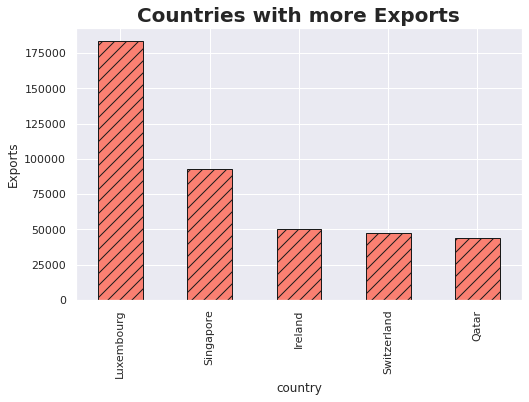

In [27]:
plt.figure(figsize=(8, 5))
df.groupby('country').exports.sum().sort_values(ascending=False).head().plot.bar(color='salmon',hatch="//",edgecolor='k')
plt.ylabel('Exports')
plt.title('Countries with more Exports',fontweight="bold", size=20)
plt.show()


- ### <font color=green>Luxembourg has more export of goods and services of around 183750, due to which that country has the highest GDP per capita
- ### <font color=green>Myanmar is the country with least exports and next to it is Burundi. Even Imports were less for these countries.     
    

- ### <font color=blue>Health

In [28]:
Health=df.sort_values(by=['health'], ascending= True)
Health[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420,11.6000,61.7000,4.6100,482
93,Madagascar,62.2000,103.2500,15.5701,177.5900,1390,8.7900,60.8000,4.6000,413
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888,2.0100,47.5000,5.2100,446
112,Niger,123.0000,77.2560,17.9568,170.8680,814,2.5500,58.8000,7.4900,348
107,Myanmar,64.4000,1.0769,19.4636,0.6511,3720,7.0400,66.8000,2.4100,988


In [29]:
Health1=df.sort_values(by=['health'], ascending= False)
Health1[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3000,6001.6000,8663.6000,7647.2000,49400,1.2200,78.7000,1.9300,48400
145,Switzerland,4.5000,47744.0000,8579.0000,39761.8000,55500,0.3170,82.2000,1.5200,74600
114,Norway,3.2000,34856.6000,8323.4400,25023.0000,62300,5.9500,81.0000,1.9500,87800
91,Luxembourg,2.8000,183750.0000,8158.5000,149100.0000,91700,3.6200,81.3000,1.6300,105000
44,Denmark,4.1000,29290.0000,6612.0000,25288.0000,44000,3.2200,79.5000,1.8700,58000


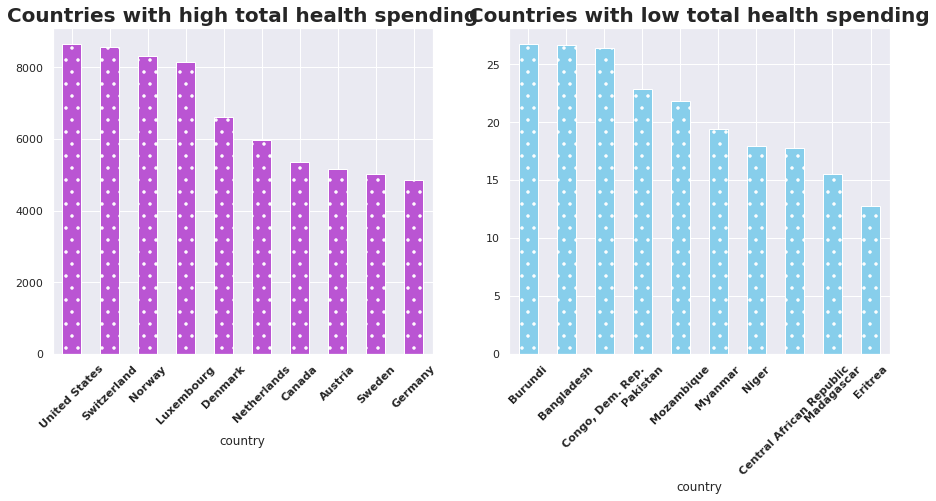

In [30]:
plt.figure(figsize=(15, 6))
He=df.groupby('country').health.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='mediumorchid',hatch=".")
plt.title('Countries with high total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color= 'skyblue',hatch='.')
plt.title('Countries with low total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()



- ### <font color=green>United States spends more per person on health than comparable countries which is 8663.
- ### <font color=green>Eritrea spends less on health

- ### <font color=blue> Total Fertility

In [31]:
Fertility=df.sort_values(by=['total_fer'], ascending= True).head()
Fertility

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8000,93200.0000,1845.3600,81084.0000,72100,-0.0460,82.7000,1.1500,46600
138,South Korea,4.1000,10917.4000,1531.5300,10210.2000,30400,3.1600,80.1000,1.2300,22100
67,Hungary,6.0000,10715.8000,960.2300,10021.5000,22300,2.3300,74.5000,1.2500,13100
102,Moldova,17.2000,638.9600,190.7100,1279.5500,3910,11.1000,69.7000,1.2700,1630
20,Bosnia and Herzegovina,6.9000,1369.1700,511.7100,2364.9300,9720,1.4000,76.8000,1.3100,4610


In [32]:
Fertility1=df.sort_values(by=['total_fer'], ascending=False).head()
Fertility1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0000,77.2560,17.9568,170.8680,814,2.5500,58.8000,7.4900,348
32,Chad,150.0000,330.0960,40.6341,390.1950,1930,6.3900,56.5000,6.5900,897
97,Mali,137.0000,161.4240,35.2584,248.5080,1870,4.3700,59.5000,6.5500,708
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609,20.8000,57.5000,6.5400,334
26,Burundi,93.6000,20.6052,26.7960,90.5520,764,12.3000,57.7000,6.2600,231


In [33]:
df.total_fer.max()

7.49

In [34]:
df.life_expec.max()

82.8

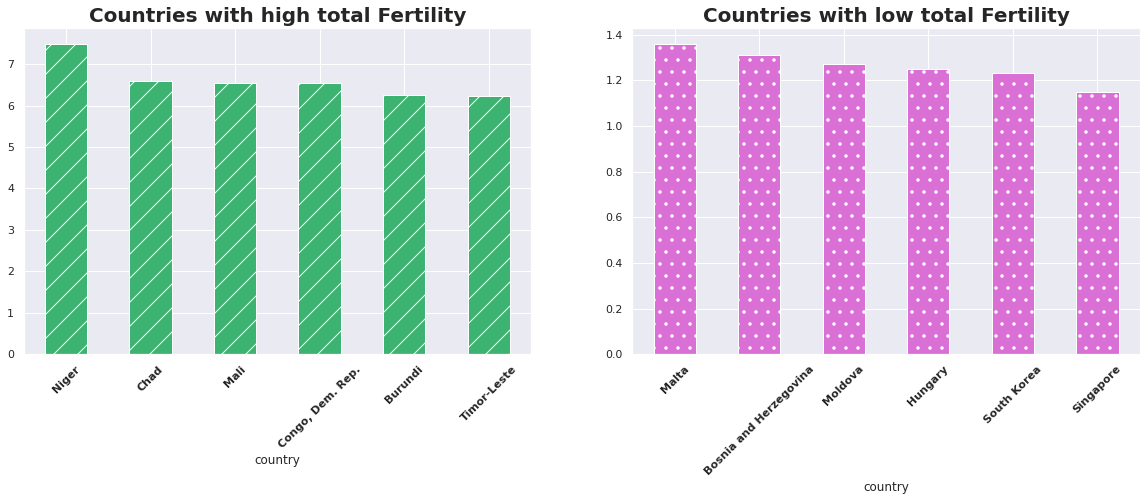

In [35]:
plt.figure(figsize=(20, 6))
Fe=df.groupby('country').total_fer.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar(color='mediumseagreen',hatch="/")
plt.title('Countries with high total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar(color= 'orchid',hatch='.')
plt.title('Countries with low total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()



### <font color=green> Less number of children born to each woman,can survive more, As we see Singapore, South Korea have more life expectancy and less total fertility. 
### <font color=green> Chad, Mali and Congo Dem Republic have very high fertility and child morality    

## <font color=blue>Inflation

In [36]:
In=df.sort_values(by=['inflation'], ascending=False).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150,104.0000,60.5000,5.8400,2330
163,Venezuela,17.1000,3847.5000,662.8500,2376.0000,16500,45.9000,75.4000,2.4700,13500
103,Mongolia,26.1000,1237.5500,144.1600,1502.5500,7710,39.2000,66.2000,2.6400,2650
149,Timor-Leste,62.6000,79.2000,328.3200,1000.8000,1850,26.5000,71.1000,6.2300,3600
49,Equatorial Guinea,111.0000,14671.8000,766.0800,10071.9000,33700,24.9000,60.9000,5.2100,17100


In [37]:
In=df.sort_values(by=['inflation'], ascending=True).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4000,10130.4000,367.2000,11664.0000,20400,-4.2100,73.4000,2.1700,10800
73,Ireland,4.2000,50161.0000,4475.5300,42125.5000,45700,-3.2200,80.4000,2.0500,48700
77,Japan,3.2000,6675.0000,4223.0500,6052.0000,35800,-1.9000,82.8000,1.3900,44500
43,Czech Republic,3.4000,13068.0000,1560.2400,12454.2000,28300,-1.4300,77.5000,1.5100,19800
135,Slovenia,3.2000,15046.2000,2201.9400,14718.6000,28700,-0.9870,79.5000,1.5700,23400


### <font color=green>Nigeria is having high inflation rate where as Japan,Ireland has very less Inflation rates

### <font color=blue>Distplot

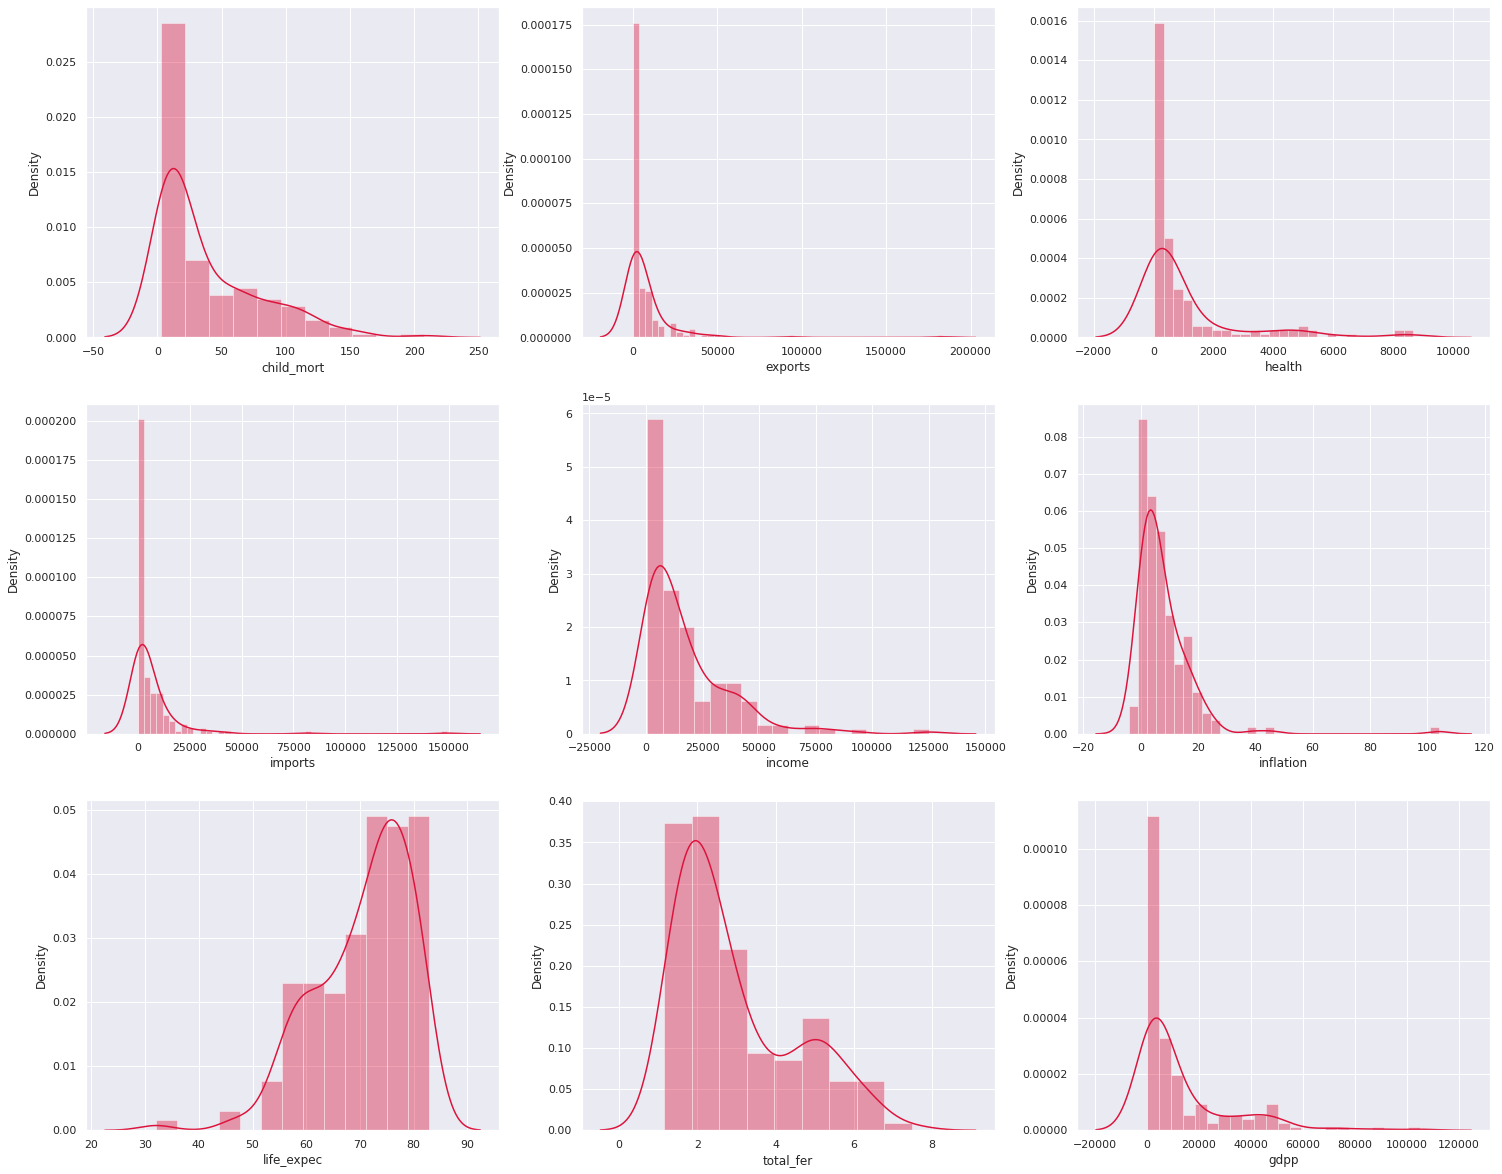

In [38]:
plt.figure(figsize = (20,16))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.distplot(df[i[1]], color='crimson')
    plt.subplots_adjust(right=1.1)
    plt.subplots_adjust(top=1.1)

- ### <font color=green>By looking at the plots we can see that, Child Mortality, Income and GDP are the three columns that have a variation in the data. 
- ### <font color=green> Hence we can consider these three columns for cluster profiling   

# <font color=purple>5. Checking outliers</font>

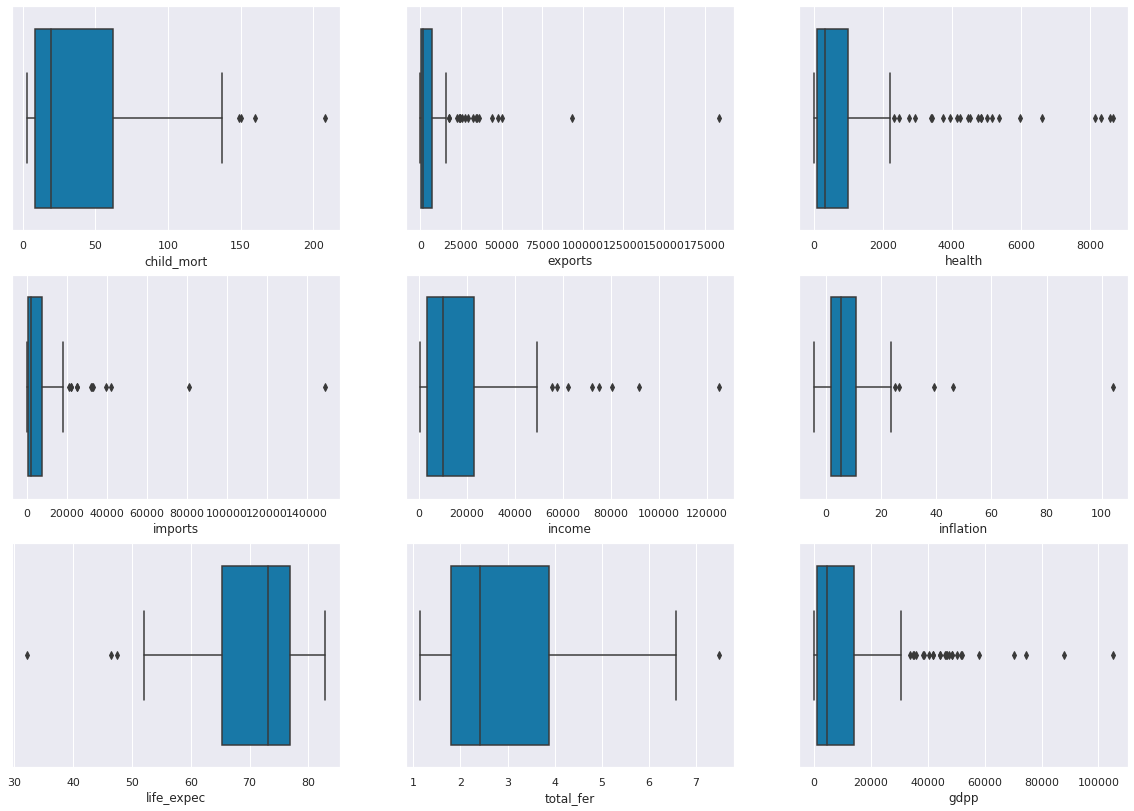

In [39]:
plt.figure(figsize = (20,14))
feature = df.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]],palette='winter')

- ### <font color=green> There are outliers in the data. we need to treat them as The clustering process is very sensitive to the presence of outliers in the data.

- ## <font color=blue>Outlier Treatment

In [40]:
#outliers before treatment
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1056.7332,6588.3521,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,17973.8858,1801.4089,14710.8104,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8663.6000,149100.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


In [41]:
#Capping
q2 = df['imports'].quantile(0.99)
q3 = df['health'].quantile(0.99)
q4 = df['income'].quantile(0.99)
q5 = df['inflation'].quantile(0.99)
q6 = df['life_expec'].quantile(0.99)
q7 = df['total_fer'].quantile(0.99)
q8 = df['gdpp'].quantile(0.99)

df['imports'][df['imports']>= q2] = q2
df['health'][df['health']>= q3] = q3
df['income'][df['income']>= q4] = q4
df['inflation'][df['inflation']>= q5] = q5
df['life_expec'][df['life_expec']>= q6] = q6
df['total_fer'][df['total_fer']>= q7] = q7
df['gdpp'][df['gdpp']>= q8] = q8


In [42]:
#Outliers after treatment
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,7420.6188,1054.2066,5873.1352,16857.5509,7.3810,70.5511,2.9423,12756.8263
std,40.3289,17973.8858,1790.8453,9422.7009,17957.0129,7.7932,8.8870,1.4983,17430.2089
min,2.6000,1.0769,12.8212,0.6511,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,183750.0000,8410.3304,55371.3900,84374.0000,41.4780,82.3700,6.5636,79088.0000


# <font color=purple>6. Clustering

- ## <font color=purple>Hopkins check

### <font color=blue>The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [43]:
# Check the hopkins

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [44]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000


In [45]:
hopkins(df.drop('country', axis = 1))

0.9551990217417128

- ### <font color=green>We can see that the value is between {0.8, ..., 0.99}, so the dataset has a high tendency to cluster.

- ## <font color=purple>Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.4110113 , -0.56695778, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.35019096, -0.4403934 , ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.31852577, -0.48627082, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.36146329, -0.54024972, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.39216643, -0.55242911, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.38395214, -0.54227159, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [47]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.4110,-0.5670,-0.5987,-0.8517,0.2650,-1.6197,1.9264,-0.7023
1,-0.5389,-0.3502,-0.4404,-0.4136,-0.3869,-0.3721,0.6488,-0.8651,-0.4987
2,-0.2728,-0.3185,-0.4863,-0.4761,-0.2211,1.1222,0.6714,-0.0350,-0.4774
3,2.0078,-0.2914,-0.5341,-0.4640,-0.6120,1.9330,-1.1795,2.1540,-0.5310
4,-0.6956,-0.1043,-0.1784,0.1397,0.1253,-0.7646,0.7053,-0.5437,-0.0320


# <font color=purple>7. K-Mean Clustering

- ### <font color=green>To Choose the value of k, there are two methods, 1. Silhouette score  2. Elbow curve-ssd

- ### <font color=purple>Silhouette score


$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

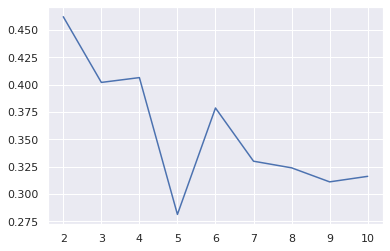

In [48]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

- ### <font color=green>From the plot of silhouette score above, We can see that we have the maximum at 2, and next maximum is at 3. So we can go with 3.

- ### <font color=purple>Elbow curve

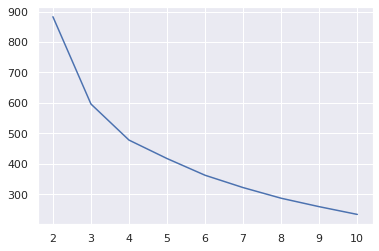

In [49]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

- ### <font color=purple>From the elbow curve above we can see that we have a breakpoint at 3 and one breakpoint at 4. 
    
- ### <font color=purple>From both the plots above, We can go with the lower value for k, which is 3 here. So k=3

In [50]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=50)

In [51]:
df_kmean = df.copy()

In [52]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,1
2,1
3,2
4,1


In [53]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,2
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,1
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,1
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,2
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,1


In [54]:
df_kmean.label.value_counts()

1    89
2    48
0    30
Name: label, dtype: int64

- ### <font color=green>Cluster 1 is having high number of data points compared to other two clusters

## <font color=purple>Plotting the clusters

- ### <font color=blue>Child Mortality vs Income

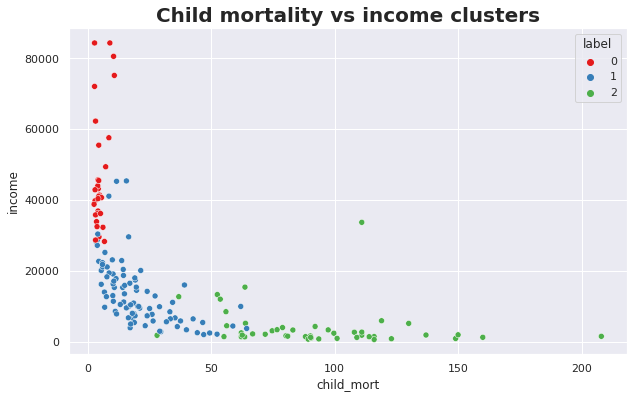

In [55]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20)

plt.show()

- ### <font color=blue> Income vs GDP

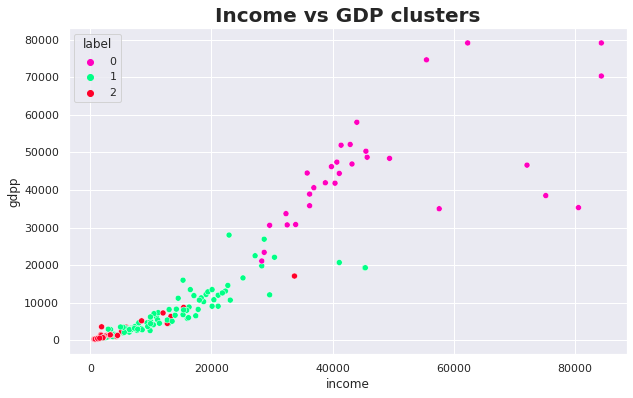

In [56]:
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'gist_rainbow_r')
plt.title('Income vs GDP clusters',fontweight="bold", size=20)
plt.show()

- ### <font color=blue>Child Mortality vs GDP

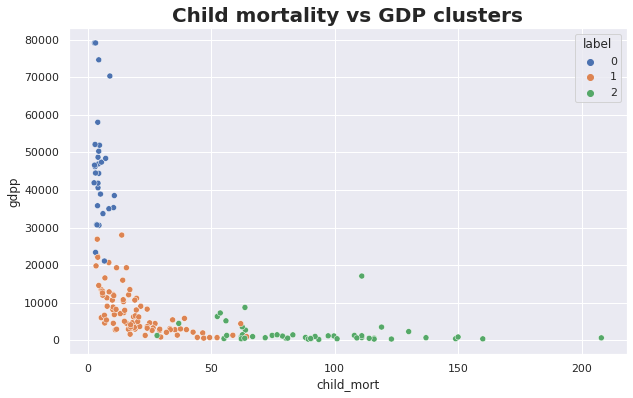

In [57]:
# Plot the cluster|
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'deep')
plt.title('Child mortality vs GDP clusters',fontweight="bold", size=20 )
plt.show()

# <font color=purple>8. Cluster Profiling

In [58]:
# Making sense out of the clsuters by finding the mean
df2=df_kmean.drop('country', axis = 1).groupby('label').mean()
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,4.9700,29827.5633,4175.8450,20941.7193,47178.2667,2.8398,80.4847,1.7967,45552.5333
1,20.7270,3395.7461,508.6035,3515.3328,13626.8539,7.1710,73.3034,2.2336,7552.4944
2,91.6104,879.0635,114.8218,827.0288,3897.3542,10.6086,59.2396,4.9722,1909.2083


- ### <font color=green>Above we can see the cluster centres for the three clusters we got
    

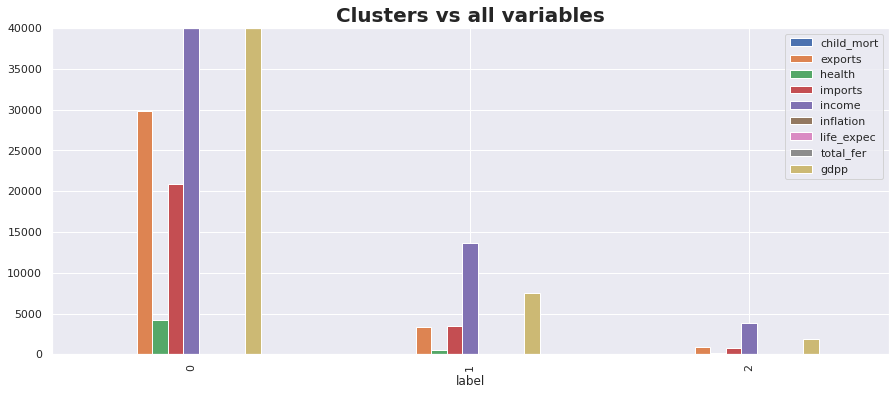

In [59]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

- ### <font color=green>Cluster property is not that clear with all the columns

In [60]:
df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')

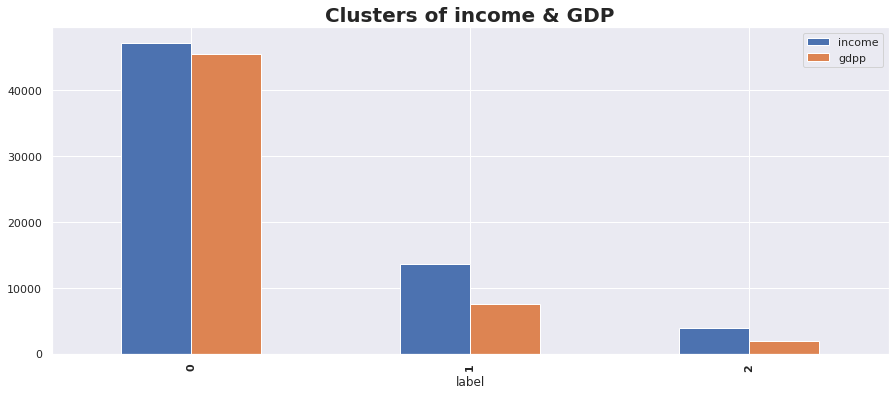

In [61]:
df_kmean.drop(['country', 'exports', 'health', 'imports','child_mort',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.title('Clusters of income & GDP',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- ### <font color=green> Cluster 0 is having high income and high GDP 
- ### <font color=green> Cluster 2 is having very low income and GDP
              

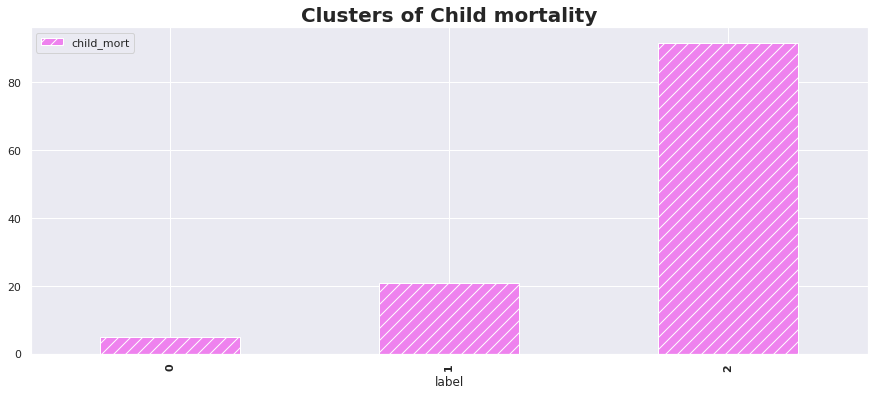

In [62]:
df_kmean.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6),color='violet',hatch="//")
plt.title('Clusters of Child mortality', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- ### <font color=green> Cluster 0 is having low child mortality
- ### <font color=green> Cluster 2 is having high child mortality  

 ### <font color=darkpink> From cluster profiling in K- means clustering we can see that :
- ### <font color=green>1. Cluster 0 is having the High income, High GDP and very Low child mortality 
- ### <font color=green>2. Cluster 2 is having  very Low income, very Low GDP but High child mortality
- ### <font color=green>3. Cluster 1 is having low income, GDP  and less child mortality 

- ### <font color=purple> We saw in cluster profiling that cluster 2 is having low income, low GDP and High Child Mortality
- ### <font color=purple> So we can say that countries under cluster 2 are in need of aid. Lets see the countries

In [63]:
Kmean=df_kmean[df_kmean['label'] == 2]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,2
17,Benin,111.0000,180.4040,31.0780,281.9760,1820.0000,0.8850,61.8000,5.3600,758.0000,2
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300.0000,8.9200,57.1000,2.8800,6350.0000,2
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,2


- ### <font color=purple> Countries we should focus more on:

In [64]:
K=Kmean[['country']]
K= K.reset_index(drop=True)
K

,country
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Burundi
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


In [65]:
#Sorting based on high child mortality,low income and GDP
final=df_kmean[df_kmean['label'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,2
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,2
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5636,897.0000,2
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,2
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,2
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150.0000,41.4780,60.5000,5.8400,2330.0000,2
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,6.5636,348.0000,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,2
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,2
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,2


In [66]:
print("Top 10 countries which are in direst need of aid" )
f=final[['country']].head(10)
df_r = f.reset_index(drop=True)
df_r

Top 10 countries which are in direst need of aid


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


- ### <font color=green> So from K means clustering, above are the 10 countries which are in direst need of aid

# <font color=purple>9. Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative.

df.head()

In [67]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.4110,-0.5670,-0.5987,-0.8517,0.2650,-1.6197,1.9264,-0.7023
1,-0.5389,-0.3502,-0.4404,-0.4136,-0.3869,-0.3721,0.6488,-0.8651,-0.4987
2,-0.2728,-0.3185,-0.4863,-0.4761,-0.2211,1.1222,0.6714,-0.0350,-0.4774
3,2.0078,-0.2914,-0.5341,-0.4640,-0.6120,1.9330,-1.1795,2.1540,-0.5310
4,-0.6956,-0.1043,-0.1784,0.1397,0.1253,-0.7646,0.7053,-0.5437,-0.0320


## <font color=purple>Single Linkage

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
![image.png](attachment:image.png)

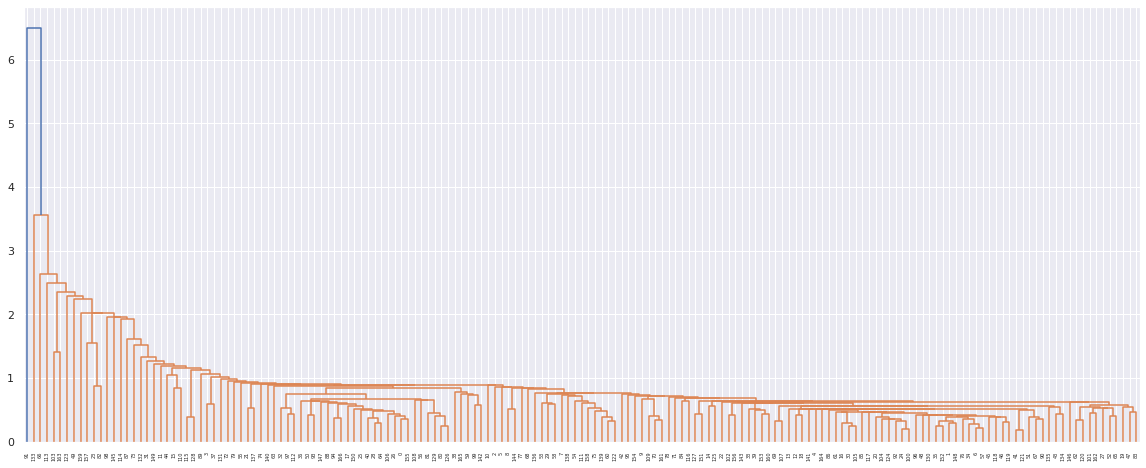

In [68]:

plt.figure(figsize = (20,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### <font color=green>We clearly see, single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

## <font color=purple>Complete Linkage

**Complete Linkage<br>**

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points. 
![image.png](attachment:image.png)

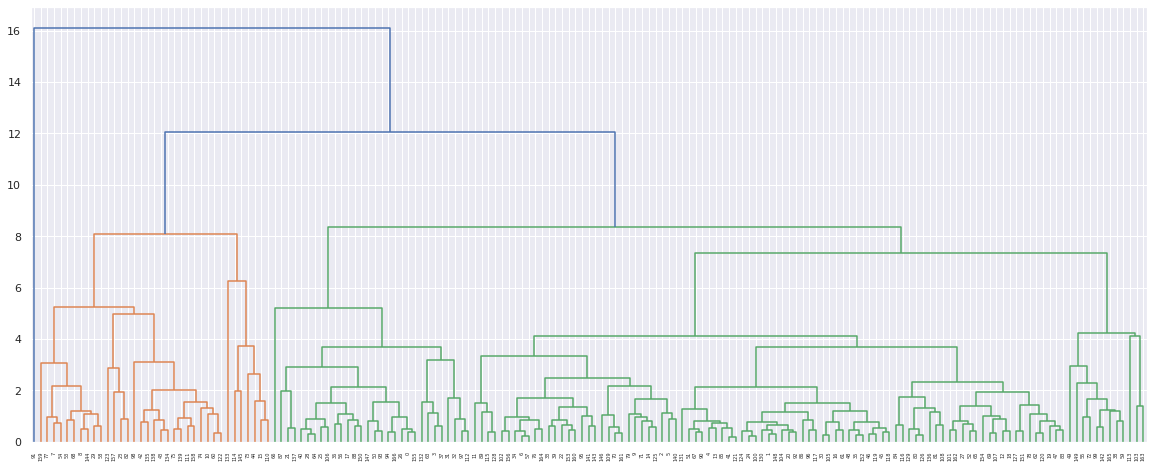

In [69]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### <font color=green>Now we got the clear dendrogram and its easier to analyse the clusters. Lets consider a threshold value of 10. Draw the horizontal line at that height. It cuts 3 vertical lines, all of which represent a cluster.
### <font color=green>So we have 3 clusters now    

In [70]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [71]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,0


In [72]:
df.cluster_labels.value_counts()

0    131
1    35 
2    1  
Name: cluster_labels, dtype: int64

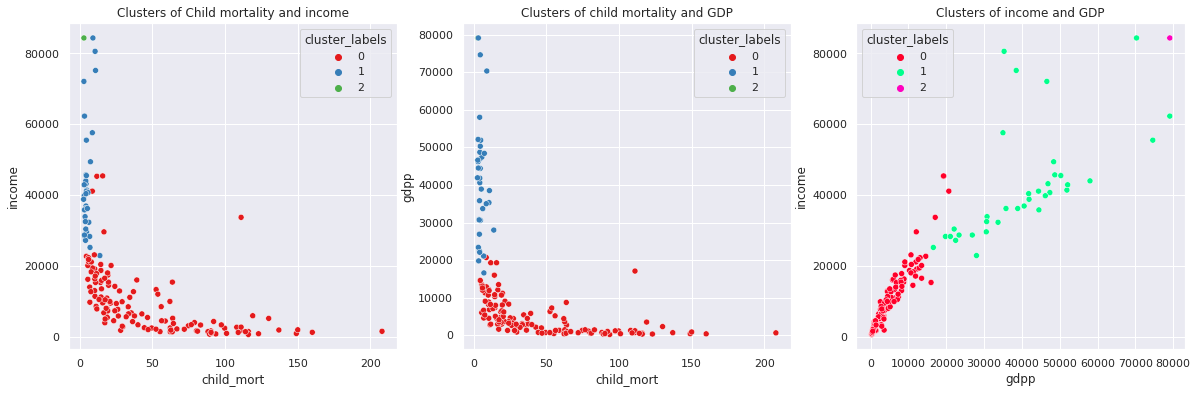

In [73]:
fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=df, palette='Set1')
plt.title('Clusters of Child mortality and income')
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=df, palette='Set1')
plt.title('Clusters of child mortality and GDP')
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=df,palette='gist_rainbow')
plt.title('Clusters of income and GDP')
plt.show()

### <font color=green> We can see that the clusters formed are not great. Cluster 2 is having only one data point

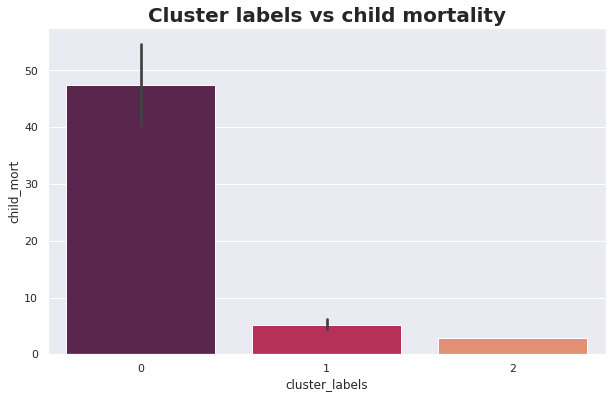

In [74]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='child_mort', data=df,palette='rocket')
plt.title('Cluster labels vs child mortality',fontweight="bold", size=20)

plt.show()

### <font color=green>Cluster 0 is having high child mortality
### <font color=green>Cluster 1 and 2 have very low child mortality
         

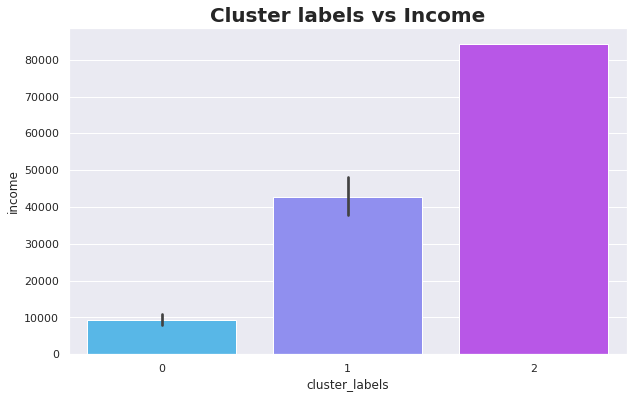

In [75]:
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='income', data=df, palette='cool')
plt.title('Cluster labels vs Income',fontweight="bold", size=20)

plt.show()


### <font color=green>Cluster 2 is having more income and cluster 1 has modertate income, cluster 0 has very least income

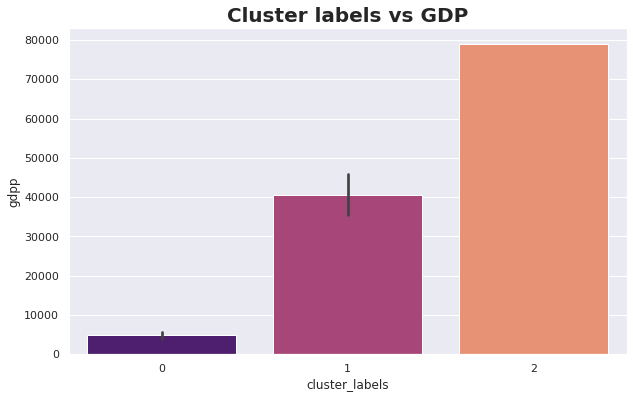

In [76]:
# plots
plt.figure(figsize = (10,6))
sns.barplot(x='cluster_labels', y='gdpp', data=df, palette='magma')
plt.title('Cluster labels vs GDP',fontweight="bold", size=20)

plt.show()


### <font color=green>Cluster 0 have very low GDP, cluster 2 have high GDP and cluster 1 has moderte GDP

 ### <font color=darkpink> From cluster profiling using hierarchical clustering we can see that :
- ### <font color=green>1. Cluster 0 is having the High child mortality, low GDP and very Low child mortality 
- ### <font color=green>2. Cluster 1 is having  Low child mortality, moderate income and GDP
- ### <font color=green>3. Cluster 2 is having very low child mortality,high income and GDP

- ### <font color=purple> We saw in cluster profiling that cluster 0 is having low income, low GDP and High Child Mortality
- ### <font color=purple> So we can say that countries under cluster 0 are in need of aid. Lets see the countries

In [77]:
df[df['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,0


In [78]:
df1=df[df['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
df1.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5636,897.0000,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,0
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150.0000,41.4780,60.5000,5.8400,2330.0000,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,6.5636,348.0000,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,0


In [79]:
print("5 countries which are in direst need of aid based on hierarchical clustering" )
final_hier=df1[['country']].head()
hier= final_hier.reset_index(drop=True)
hier


5 countries which are in direst need of aid based on hierarchical clustering


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


- ### <font color=green> So from Hierarchical clustering, above are the five countries which are in direst need of aid

**We have analyzed both K-means and Hierarchical clustering and found clusters formed in both are not identical.
The clusters formed in Hierarchical clustering are not great.
So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.**

# <font color=purple>10. Final Analysis

### <font color=green>From K means clustering we got better clusters compared to Hierarchical clustering. 
### <font color=green> Cluster 2 is the better cluster we got with High child mortality, low income and low GDP    
### <font color=green>    Final list of country we got are:

In [80]:
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,2
17,Benin,111.0000,180.4040,31.0780,281.9760,1820.0000,0.8850,61.8000,5.3600,758.0000,2
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300.0000,8.9200,57.1000,2.8800,6350.0000,2
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,2


In [81]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()                                                                

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,2
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,2
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5636,897.0000,2
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,2
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,2


In [82]:
print('10 Countries based on high child mortality, low income and low GDP')
Kmean[['country']].head(10)

10 Countries based on high child mortality, low income and low GDP


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


### <font color=purple>Lets choose countries based on socio economic and health factors

In [83]:
Kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,91.6104,879.0635,114.8218,827.0288,3897.3542,10.6086,59.2396,4.9722,1909.2083,2.0000
std,34.3199,2252.4740,165.5183,1540.9819,5590.1686,8.5112,6.3849,0.9956,2925.9110,0.0000
min,28.1000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,2.5900,231.0000,2.0000
25%,63.6750,102.8738,34.0059,193.3195,1390.0000,4.0800,56.7250,4.4750,551.5000,2.0000
50%,89.7500,196.2600,51.6135,339.3060,1860.0000,8.8550,59.8000,5.0550,932.0000,2.0000
75%,111.0000,552.5225,95.3033,801.0000,3522.5000,16.6000,62.8250,5.5975,1465.0000,2.0000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,41.4780,71.1000,6.5636,17100.0000,2.0000


### <font color=green>For selected cluster Mean value of child mortality is 91.61. Lets choose the countries more than this mean value as we are looking at high child mortality rates

In [84]:
df_final_list = Kmean[Kmean['child_mort']>91]
df_final_list.shape

(21, 11)

In [85]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000,21.0000
mean,121.7048,1010.7922,83.5849,850.4614,3639.1905,11.2144,56.5476,5.3865,1708.1905,2.0000
std,27.1645,3164.9888,159.5347,2143.0015,7039.6580,10.1995,7.4018,0.9669,3607.6773,0.0000
min,92.1000,20.6052,17.7508,90.5520,609.0000,0.8850,32.1000,3.3000,231.0000,2.0000
25%,108.0000,101.2860,26.7960,170.8680,1190.0000,4.1500,55.6000,5.1100,446.0000,2.0000
50%,114.0000,161.4240,40.6341,279.9360,1820.0000,6.8100,57.7000,5.3400,708.0000,2.0000
75%,130.0000,460.9800,64.6600,428.3140,2690.0000,17.2000,60.1000,6.1600,1200.0000,2.0000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,41.4780,68.2000,6.5636,17100.0000,2.0000


### <font color=green>Now Mean value of income is 3639. Lets choose the countries less than this mean value.

In [86]:
df_final_list1 = df_final_list[df_final_list['income']<3639]
df_final_list1.shape

(17, 11)

In [87]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000,17.0000
mean,123.7471,213.2798,43.9756,333.3082,1611.3529,7.9897,55.3353,5.4151,698.3529,2.0000
std,29.1763,187.1063,26.6780,274.7639,781.5389,6.4973,7.6932,0.9839,345.5676,0.0000
min,93.6000,20.6052,17.7508,90.5520,609.0000,0.8850,32.1000,3.3000,231.0000,2.0000
25%,108.0000,81.5030,26.7960,170.2000,918.0000,2.9700,55.0000,5.1100,419.0000,2.0000
50%,114.0000,137.2740,38.7550,248.5080,1430.0000,5.4500,57.3000,5.3400,648.0000,2.0000
75%,137.0000,290.8200,52.2690,390.1950,1930.0000,12.3000,58.0000,6.2600,897.0000,2.0000
max,208.0000,617.3200,129.8700,1181.7000,3320.0000,20.8000,68.2000,6.5636,1310.0000,2.0000


### <font color=green>Now Mean value of GDP is 698. Lets choose the countries less than this mean value.

In [88]:
df_final_list2 = df_final_list1[df_final_list1['gdpp']<698]
df_final_list2.shape

(10, 11)

In [89]:
df_final_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,2
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,2
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,2
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,6.5636,348.0000,2
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,2
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,2
64,Guinea-Bissau,114.0000,81.5030,46.4950,192.5440,1390.0000,2.9700,55.6000,5.0500,547.0000,2
63,Guinea,109.0000,196.3440,31.9464,279.9360,1190.0000,16.1000,58.0000,5.3400,648.0000,2
106,Mozambique,101.0000,131.9850,21.8299,193.5780,918.0000,7.6400,54.5000,5.5600,419.0000,2
26,Burundi,93.6000,20.6052,26.7960,90.5520,764.0000,12.3000,57.7000,6.2600,231.0000,2


## **Final List of countries which are in need of the aid based on socio-economic factors.**

In [90]:
A_countries=df_final_list2['country']
A_countries=A_countries.reset_index(drop=True)
A_countries

0    Haiti                   
1    Sierra Leone            
2    Central African Republic
3    Niger                   
4    Congo, Dem. Rep.        
5    Burkina Faso            
6    Guinea-Bissau           
7    Guinea                  
8    Mozambique              
9    Burundi                 
Name: country, dtype: object

## <font color=purple>Inferences

- #### <font color=green>From the EDA performed we could see that Income,  GDP and child Mortality are the major three variables need to be focused
- #### <font color=green>In K means clustering we got Cluster 2 is having very Low income, very Low GDP but High child mortality. So we concluded that countries under cluster 2 are in need of aid.
- #### <font color=green>In Hierarchical clustering we saw that Cluster 0 is having the High child mortality, low GDP and very Low child mortality. 
- #### <font color=green>The clusters formed in Hierarchical clustering were not that good. So we went on to consider cluster formed in K means clustering. And got top five countries with High child mortality,Low GDP and Low income
- #### <font color=green> Then we looked for the countries based on socio economic factors   

In [91]:
print('Top 5 Countries based on K means clustering:')
Kmean[['country']].head()

Top 5 Countries based on K means clustering:


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali


In [92]:
print('Countries based on socio economic and health factors:')
A_countries

Countries based on socio economic and health factors:


0    Haiti                   
1    Sierra Leone            
2    Central African Republic
3    Niger                   
4    Congo, Dem. Rep.        
5    Burkina Faso            
6    Guinea-Bissau           
7    Guinea                  
8    Mozambique              
9    Burundi                 
Name: country, dtype: object

## <font color=purple>Recommendations

- #### From the analysis performed, We can see that low income people have high child mortality, so CEO must focus more on low income countries
- #### We could also see Low GDP per capita countries are not having much import and export of goods and services. Those countries also must be focused
- #### There are some countries which spend well on health for the people living in that country. For ex: US. Such countries can be skipped. And focus more on Burundi, Congo, Dem. Rep where the total health spending is too less.
- #### If the total fertility is less the life expectency is more. Haiti is the country having very low life expectancy, and high child mortality. Its good to have less children per woman,so that they could be looked after well.
